In [4]:
import pandas as pd
import numpy as np

import json

import matplotlib
import matplotlib.pyplot as plt

# US

In [5]:
us = pd.read_csv("USvideos.csv")
us.head()
us.dtypes
us['trending_date'] = pd.to_datetime(us['trending_date'], format = '%y.%d.%m')
us['trending_YearMonth'] = us['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
us['publish_time'] = pd.to_datetime(ca['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
us_max_byMonth = us.groupby(['trending_YearMonth','title'])['views','likes','dislikes'].max()
us_view_max_byMonth = us_max_byMonth['views'].groupby(level=0, group_keys=False)
us_top20_byMonth = us_view_max_byMonth.nlargest(20)
us_top20_byMonth

NameError: name 'ca' is not defined

In [33]:
us_max_byMonth = us.groupby(['trending_YearMonth','title'])['views','likes','dislikes'].max()
us_max_byMonth.head()

views  \
trending_YearMonth title                                                         
2017-11            #AboveTheNoise feat. Serena Williams, Neymar Jr...  2152261   
                   #StarOnFox Exclusive Clip for TheYBF.com               2087   
                   #VeteransDay: Thank You for Everything               849499   
                   $1000 PR Unboxing With Beauty Editor | Beauty W...    24907   
                   'I have taken poison' claims war criminal            279561   

                                                                       likes  \
trending_YearMonth title                                                       
2017-11            #AboveTheNoise feat. Serena Williams, Neymar Jr...   7824   
                   #StarOnFox Exclusive Clip for TheYBF.com                4   
                   #VeteransDay: Thank You for Everything              27121   
                   $1000 PR Unboxing With Beauty Editor | Beauty W...    611   
                   'I have taken poison' claims war criminal             720   

                                                                       dislikes  
trending_YearMonth title                                                         
2017-11            #AboveTheNoise feat. Serena Williams, Neymar Jr...       158  
                   #StarOnFox Exclusive Clip for TheYBF.com                   0  
                   #VeteransDay: Thank You for Everything                  2042  
                   $1000 PR Unboxing With Beauty Editor | Beauty W...        42  
                   'I have taken poison' claims war criminal                310

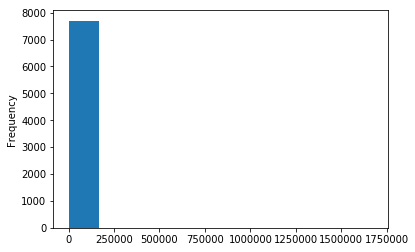

In [40]:
# Histogram
us_max_byMonth['dislikes'].plot.hist()

plt.show()

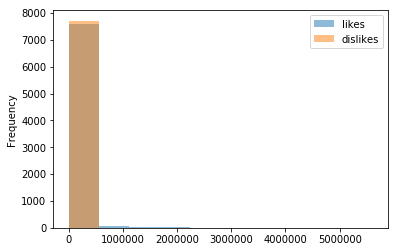

In [42]:
# Likes and dislikes histogram together
us_max_byMonth[['likes', 'dislikes']].plot.hist(alpha=0.5)

plt.show()

In [36]:
# Importing and Process the Data From Json File To Get Our Categories 
#This will hold entire data extracted from json file
find_category={}
# Create a function to automate the task of data collection
with open("US_category_id.json","r") as d:
    data=json.load(d)
    for category in data["items"]:
        # Store the category id with category name
        find_category[category["id"]]=category["snippet"]["title"]
find_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [43]:
# Create the category dataframe
records = list(find_category.items())

category_df = pd.DataFrame.from_records(records, columns=['id', 'category'])
category_df

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [44]:
#  how popular each category is
category_count = category_df['category'].value_counts() # frequency for each category
category_count

Comedy                   2
Travel & Events          1
Music                    1
Autos & Vehicles         1
Documentary              1
Thriller                 1
Gaming                   1
Trailers                 1
Sports                   1
Short Movies             1
Horror                   1
Family                   1
News & Politics          1
Anime/Animation          1
Action/Adventure         1
Nonprofits & Activism    1
People & Blogs           1
Science & Technology     1
Entertainment            1
Education                1
Foreign                  1
Classics                 1
Pets & Animals           1
Shorts                   1
Drama                    1
Shows                    1
Howto & Style            1
Film & Animation         1
Videoblogging            1
Movies                   1
Sci-Fi/Fantasy           1
Name: category, dtype: int64

# GB

In [10]:
gb = pd.read_csv("GBvideos.csv")
gb.head()
gb.dtypes
gb['trending_date'] = pd.to_datetime(gb['trending_date'], format = '%y.%d.%m')
gb['trending_YearMonth'] = gb['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
gb['publish_time'] = pd.to_datetime(gb['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
gb_max_byMonth = gb.groupby(['trending_YearMonth','title'])['views','likes','dislikes'].max()
gb_view_max_byMonth = gb_max_byMonth['views'].groupby(level=0, group_keys=False)
gb_top20_byMonth = gb_view_max_byMonth.nlargest(20)
gb_top20_byMonth

trending_YearMonth  title                                                                                    
2017-11             Ed Sheeran - Perfect (Official Music Video)                                                  138578860
                    Eminem - Walk On Water (Audio) ft. Beyoncé                                                    39235314
                    Post Malone - rockstar ft. 21 Savage                                                          38780141
                    Marvel Studios' Avengers: Infinity War Official Trailer                                       37736281
                    Post Malone - rockstar ft. 21 Savage (Official Audio)                                         35463645
                    BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV                                         33810576
                    Jennifer Lopez - Amor, Amor, Amor (Official Video) ft. Wisin                                  31815783
                    Taylor Sw

# CA

In [11]:
ca = pd.read_csv("CAvideos.csv")
ca.head()
ca.dtypes
ca['trending_date'] = pd.to_datetime(ca['trending_date'], format = '%y.%d.%m')
ca['trending_YearMonth'] = ca['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
ca['publish_time'] = pd.to_datetime(ca['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
ca_max_byMonth = ca.groupby(['trending_YearMonth','title'])['views','likes','dislikes'].max()
ca_view_max_byMonth = ca_max_byMonth['views'].groupby(level=0, group_keys=False)
ca_top20_byMonth = ca_view_max_byMonth.nlargest(20)
ca_top20_byMonth

trending_YearMonth  title                                                                                               
2017-11             Luis Fonsi, Demi Lovato - Échame La Culpa                                                                56843038
                    Ed Sheeran - Perfect (Official Music Video)                                                              39082222
                    Marvel Studios' Avengers: Infinity War Official Trailer                                                  37736281
                    Post Malone - rockstar ft. 21 Savage                                                                     34275219
                    Swag Se Swagat Song | Tiger Zinda Hai | Salman Khan | Katrina Kaif                                       29626879
                    BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV                                                    27670973
                    Incredibles 2 Official Teaser Trailer                  

# DE

In [12]:
de = pd.read_csv("DEvideos.csv")
de.head()
de.dtypes
de['trending_date'] = pd.to_datetime(de['trending_date'], format = '%y.%d.%m')
de['trending_YearMonth'] = de['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
de['publish_time'] = pd.to_datetime(de['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
de_max_byMonth = de.groupby(['trending_YearMonth','title'])['views','likes','dislikes'].max()
de_view_max_byMonth = de_max_byMonth['views'].groupby(level=0, group_keys=False)
de_top20_byMonth = de_view_max_byMonth.nlargest(20)

de_top20_byMonth

trending_YearMonth  title                                                                                              
2017-11             Luis Fonsi, Demi Lovato - Échame La Culpa                                                               38646917
                    Marvel Studios' Avengers: Infinity War Official Trailer                                                 37736281
                    Ed Sheeran - Perfect (Official Music Video)                                                             33523622
                    BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV                                                   24628712
                    Incredibles 2 Official Teaser Trailer                                                                   19999878
                    Post Malone - rockstar ft. 21 Savage                                                                    19654814
                    Eminem - Walk On Water (Audio) ft. Beyoncé                    

# FR

In [13]:
fr = pd.read_csv("FRvideos.csv")
fr.head()
fr.dtypes
fr['trending_date'] = pd.to_datetime(fr['trending_date'], format = '%y.%d.%m')
fr['trending_YearMonth'] = fr['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
fr['publish_time'] = pd.to_datetime(fr['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
fr_max_byMonth = fr.groupby(['trending_YearMonth','title'])['views','likes','dislikes'].max()
fr_view_max_byMonth = fr_max_byMonth['views'].groupby(level=0, group_keys=False)
fr_top20_byMonth = fr_view_max_byMonth.nlargest(20)

fr_top20_byMonth

trending_YearMonth  title                                                                                              
2017-11             Luis Fonsi, Demi Lovato - Échame La Culpa                                                               47078714
                    Ed Sheeran - Perfect (Official Music Video)                                                             33523622
                    BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV                                                   20565795
                    Eminem - Walk On Water (Audio) ft. Beyoncé                                                              17158579
                    Post Malone - rockstar ft. 21 Savage                                                                    15162291
                    Water Bottle Flip 2 | Dude Perfect                                                                      10552150
                    What's new, Atlas?                                            